## Curva ABC Famílias de Produtos

/tmp/ipykernel_61535/3604533490.py:8: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(caminho_dados)


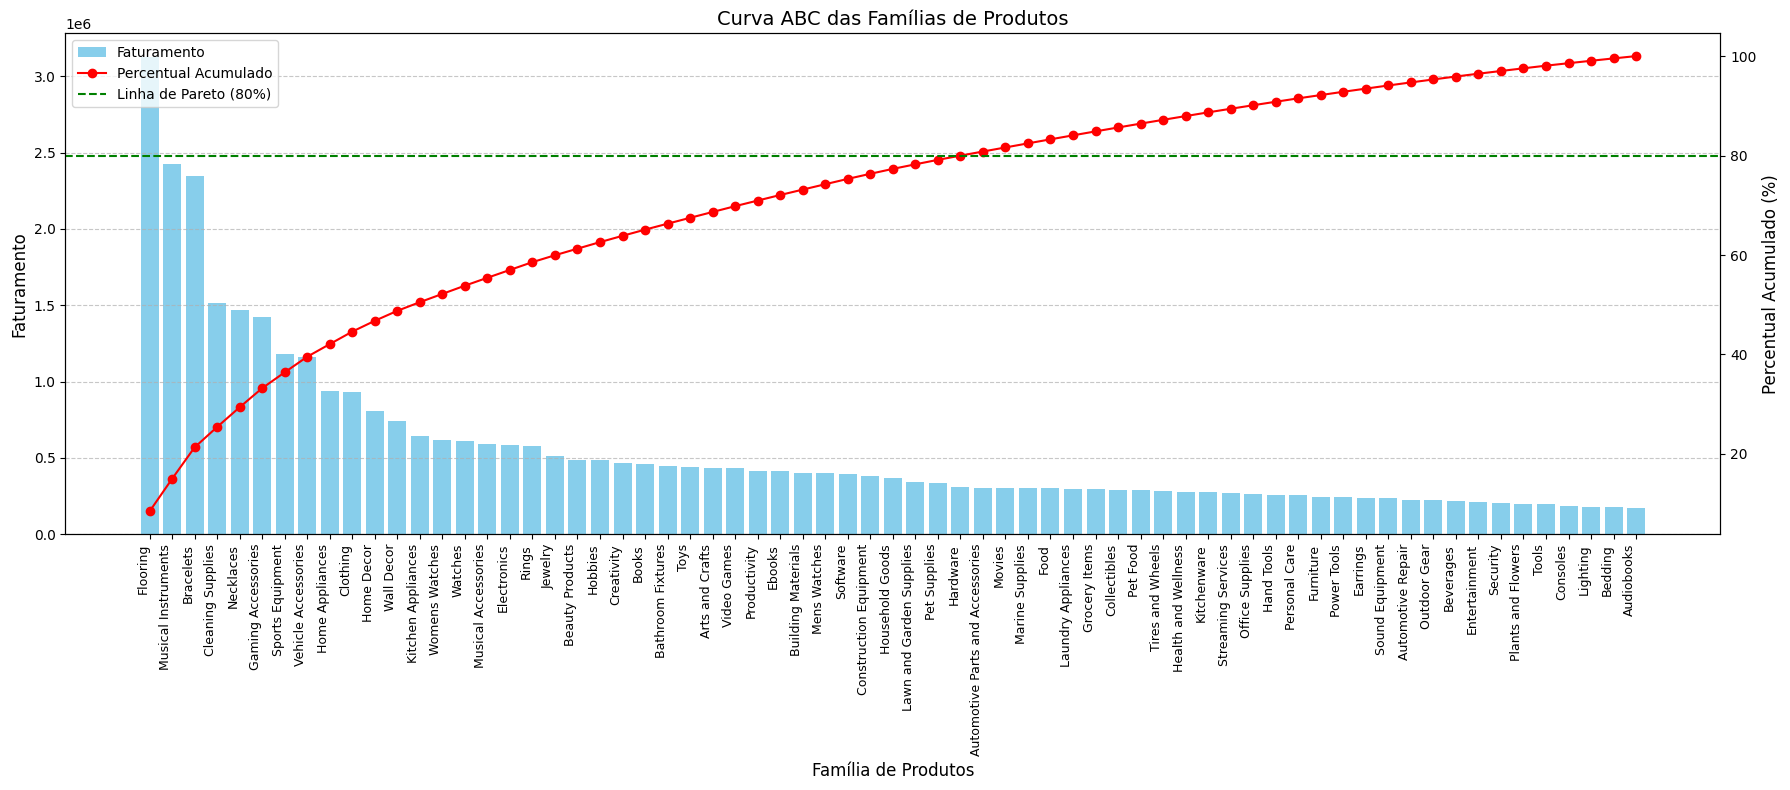

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns

diretorio_base = "/home/breno-luiz/Documents/Planilha/dados_limpos/"
caminho_dados = os.path.join(diretorio_base, "dados_completos.csv")
df = pd.read_csv(caminho_dados)
df.columns = df.columns.str.strip().str.lower()

df_familia = df.groupby("descricaofamilia")["valor_bruto"].sum().reset_index()
df_familia = df_familia.sort_values(by="valor_bruto", ascending=False)
df_familia["percentual_acumulado"] = (
    df_familia["valor_bruto"].cumsum() / df_familia["valor_bruto"].sum() * 100)

fig, ax1 = plt.subplots(figsize=(18, 8))
bars = ax1.bar(
    df_familia["descricaofamilia"],
    df_familia["valor_bruto"],
    color="skyblue",
    label="Faturamento",
)
ax1.set_xlabel("Família de Produtos", fontsize=12)
ax1.set_ylabel("Faturamento", fontsize=12)
ax1.tick_params(axis="y")
ax1.grid(axis="y", linestyle="--", alpha=0.7)
plt.setp(ax1.get_xticklabels(), rotation=90, ha="right", fontsize=9)
ax2 = ax1.twinx()
ax2.plot(
    df_familia["descricaofamilia"],
    df_familia["percentual_acumulado"],
    color="red",
    marker="o",
    label="Percentual Acumulado",
)
ax2.set_ylabel("Percentual Acumulado (%)", fontsize=12)
ax2.tick_params(axis="y")
ax2.axhline(y=80, color="green", linestyle="--", label="Linha de Pareto (80%)")

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc="upper left", fontsize=10)
plt.title("Curva ABC das Famílias de Produtos", fontsize=14)
plt.tight_layout()
plt.show()

## Faturamento Mensal

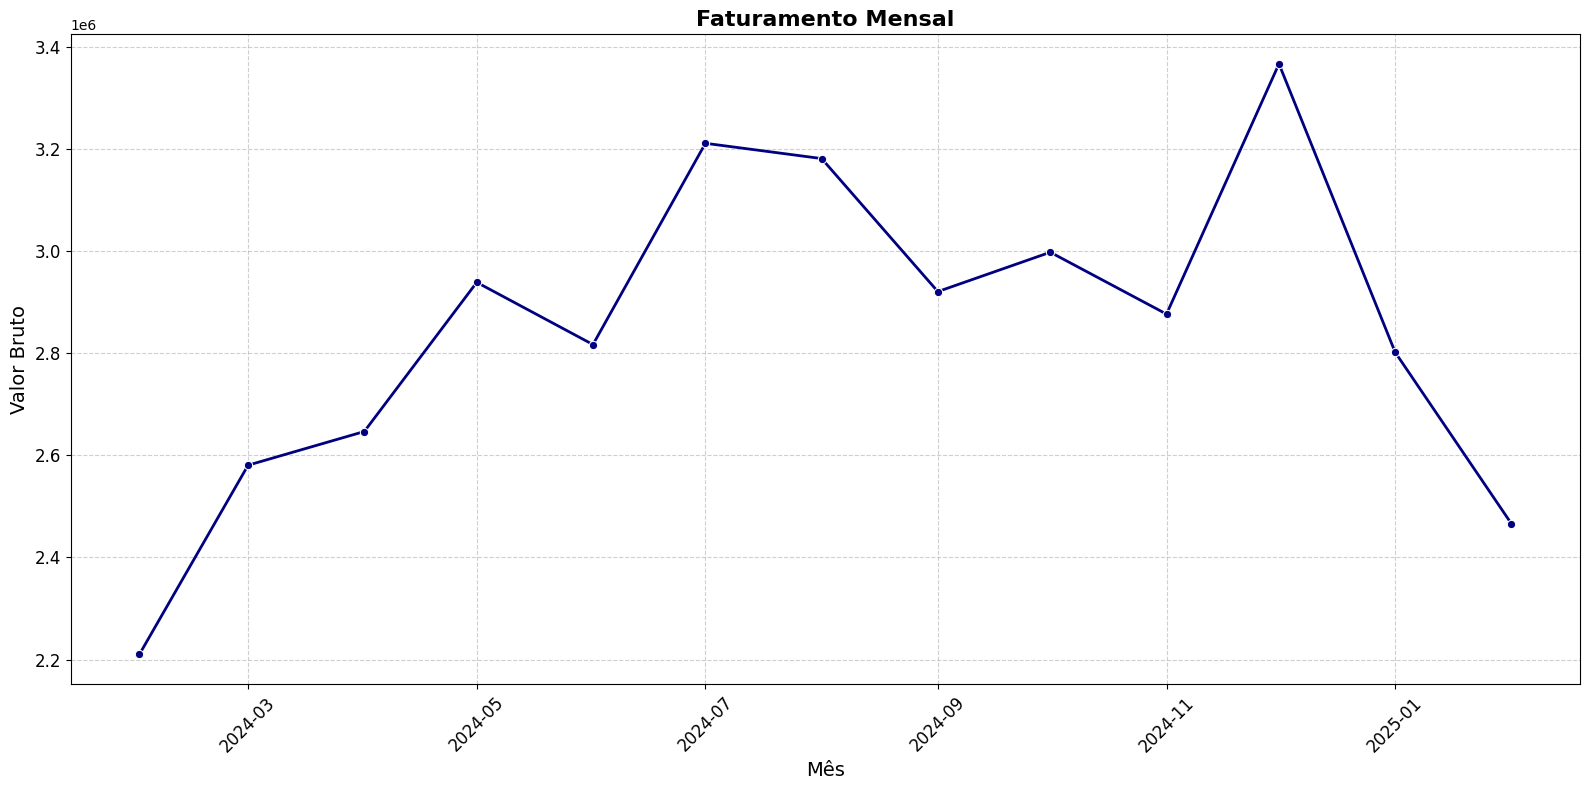

In [6]:
df["mes_ano"] = pd.to_datetime(df["mes_ano"].astype(str))
faturamento_mensal = df.groupby("mes_ano")["valor_bruto"].sum().reset_index()

fig, ax = plt.subplots(figsize=(16, 8))
sns.lineplot(data=faturamento_mensal, x="mes_ano", y="valor_bruto", marker="o", ax=ax, color="navy", linewidth=2)
ax.set_title("Faturamento Mensal", fontsize=16, fontweight="bold")
ax.set_xlabel("Mês", fontsize=14)
ax.set_ylabel("Valor Bruto", fontsize=14)
ax.grid(True, linestyle="--", alpha=0.6)
ax.tick_params(axis="x", rotation=45, labelsize=12)
ax.tick_params(axis="y", labelsize=12)
plt.tight_layout()
plt.show()

## Participação das Filiais

/tmp/ipykernel_61535/3375306487.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=faturamento_filiais.index, y=faturamento_filiais.values, palette="Blues_r")


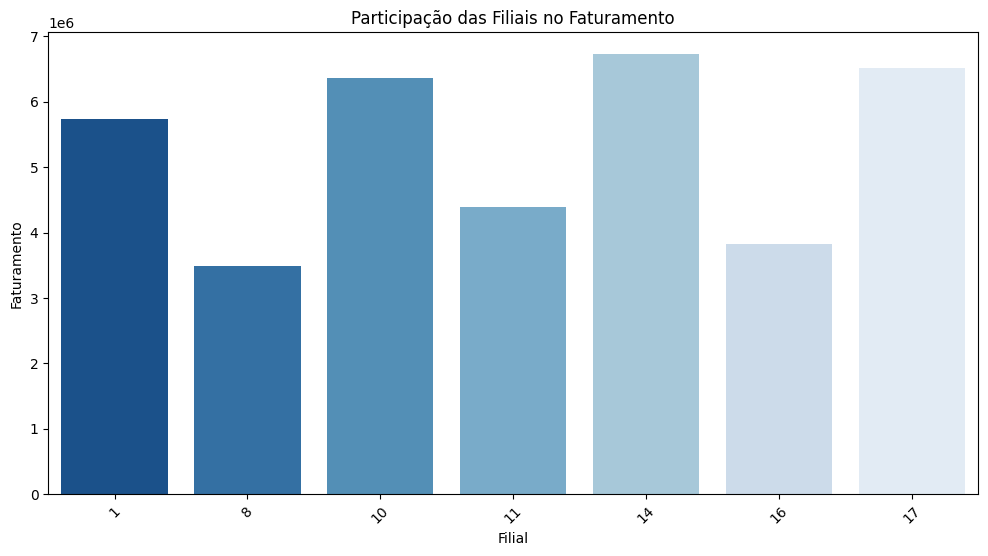

In [7]:
faturamento_filiais = df.groupby("filial_venda")["valor_bruto"].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=faturamento_filiais.index, y=faturamento_filiais.values, palette="Blues_r")
plt.title("Participação das Filiais no Faturamento")
plt.xlabel("Filial")
plt.ylabel("Faturamento")
plt.xticks(rotation=45)
plt.show()